# W2 Pre

In [ ]:
!pip install imageio

In [ ]:
from imageio import imread
# read img from path
img_path = '/content/example_usyd.jpg'
img = imread(img_path)

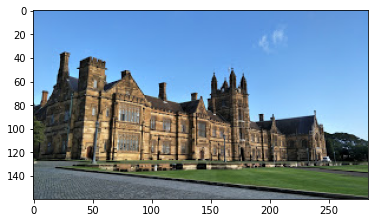

In [ ]:
# plot img
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.show()

(160, 284, 3)
[ 97 153 227]


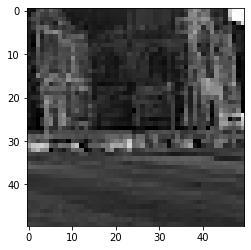

In [ ]:
# matrix shape (h, w, colorchannels_RGB)
print(img.shape)
# fetch element stored at 0th row, 5th column
print(img[0][5])
# fetch b_channel of patch
my_crop_area = img[100:150, 200:250, 2]
plt.imshow(my_crop_area, cmap='gray')

(160, 284) (160, 284) (160, 284)


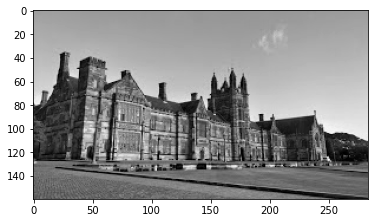

In [ ]:
r_chnl = img[:,:,0]
g_chnl = img[:,:,1]
b_chnl = img[:,:,2]
print(r_chnl.shape, g_chnl.shape, b_chnl.shape)
plt.imshow(g_chnl, cmap='gray')
plt.show()

In [ ]:
g_chnl

Array([[154, 154, 152, ..., 152, 152, 152],
       [153, 153, 153, ..., 153, 153, 152],
       [154, 154, 154, ..., 153, 153, 153],
       ...,
       [ 71,  97,  90, ..., 119, 109, 105],
       [ 94,  89,  79, ...,  73,  88,  96],
       [106,  92,  81, ...,  17,  18,  21]], dtype=uint8)

# W2

In [63]:
from imageio import imread
from matplotlib import pyplot as plt
import numpy as np

## Convolutional Filtering

This is the raw img
(384, 512, 3)


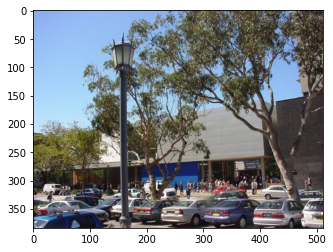

In [64]:
%matplotlib inline
print('This is the raw img')
img_path = '/content/drive/MyDrive/COMP3419/parking.jpg'
raw_img = np.array(imread(img_path))
print(raw_img.shape)
plt.figure(1)
plt.imshow(raw_img)
plt.show()

In [65]:
filters = {}

# init 3x3 avg and sharpen filters as np arrays
filters['average'] = 1/9 * np.ones((3,3), dtype=int)
sharpen_list = [0,-1,0,-1,5,-1,0,-1,0]
filters['sharpen'] = np.asarray(sharpen_list, dtype=int).reshape((3,3))


In [66]:
# helper functions

# sum if product(element-wise matrix multiplication)
def convolution_helper(neighbour, kernel):
  return np.sum(np.multiply(neighbour, kernel))

# specify the padding for three dimensions
# ((1,1), (1,1), (0,0)) => 1 padding for left and right, 
#                          1 padding for top and bottom, 
#                          no padding for color channels
def preprocessing_padding_helper(img, kernel_size):
  pad_size = int(kernel_size / 2)
  padding_3_dims = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
  img_padded = np.pad(img, padding_3_dims, 'constant', constant_values=0)
  print('*Padding: FROM ', img.shape,' TO ',img_padded.shape)
  return img_padded

In [69]:
# convolution function
def convolution_operation(img, kernel):
  processed_img = np.zeros(img.shape, dtype=int)
  kernel_size = kernel.shape[0]
  img_padded = preprocessing_padding_helper(img, kernel_size)
  # Using 2-for loop to perform matrix operation (updating pixel values)
  for row_idx in range(processed_img.shape[0]):
    for col_idx in range(processed_img.shape[1]):
      # perform convolution for each channel individually and separately
      for channel_idx in range(processed_img.shape[2]):        
        # Fetch Neighbourhood by slicing operation, whose size matching up with the size of kernel
        a = int(round((kernel.shape[0] - 1) / 2))
        b = int(round((kernel.shape[1] - 1) / 2))
        neighbour = img_padded[row_idx+1-a:row_idx+2+a, col_idx+1-b:col_idx+2+b, channel_idx]
        new_pixel = int(round(convolution_helper(neighbour, kernel)))
        # Remember to put on constraints for pixel values: 1. Range[0, 255]  2. Integer
        if new_pixel > 255:
          new_pixel = 255
        elif new_pixel < 0:
          new_pixel = 0
        processed_img[row_idx][col_idx][channel_idx] = new_pixel

  # processed_img = np.uint8(processed_img)   # You can comment off this constraint code to see the effects
  return processed_img

In [70]:
'''
    USYD CODE CITATION ACKNOWLEDGEMENT:
    generate_results function is a helper function for you to generate
    the output images of lab checkpoint submission
    - Function Input: 
            -            wk:           int, indicates a specific week's lab exercise
            -          name:           str, the name of the student
            -           SID:           int, the SID of the student
            -       raw_img: numpy.ndarray, raw image
            -   output_imgs:          dict, stores the titles and outputs 
                                            as keys and values respectively.
                             i.e. you should store your outputs as {'[task name]':[numpy array],...}
                             
            -       channel:           int, the number of color channels
                             i.e. channel=1 indicates the images are grey images
                                  channel=3 indicates the images are RGB images
    - Function Usage:
            - Supply all the arguments with the correct types and a result image
              will be generated.
    - Tips:
            - You can right click the result image plot to save the image or 
              you can take a screenshoot for the submission.
'''
def generate_results(wk, name, SID, raw_img, output_imgs, channel):
    img_size = raw_img.shape
    x = img_size[0]
    y = img_size[1]
    
    # resize input image to a suitable size
    while x > 10:
        x /= (x / 10)
        y /= (y / 10)

    # Generate one axes each for the original image and all output images
    fig, axs = plt.subplots(1, len(output_imgs)+1, figsize=(x,y))
    
    # Plot the original image
    if channel == 1:
        axs[0].imshow(raw_img, cmap='gray')
    elif channel == 3:
        axs[0].imshow(raw_img)
    axs[0].text(0.5,-0.1, 'Original Image', size=12, ha="center", transform=axs[0].transAxes)
    axs[0].axis('off')
    
    # Plot each output image
    tasks = list(output_imgs.keys())
    for i in range(1,len(tasks)+1):
        if channel == 1:
            axs[i].imshow(output_imgs[tasks[i-1]], cmap='gray')
        elif channel == 3:
            axs[i].imshow(output_imgs[tasks[i-1]])
        axs[i].text(0.5,-0.1, tasks[i-1], size=12, ha="center", transform=axs[i].transAxes)
        axs[i].axis('off')

    fig.suptitle("Week %i Lab Checkpoint\n %s SID:%i"%(wk, name, SID),x=0.5,y=0.75)
    plt.tight_layout()
    plt.show()

In [ ]:
# Generate filtered results
avg_img = convolution_operation(raw_img, filters['average'])
sharpen_img = convolution_operation(raw_img, filters['sharpen']) 
output_imgs = {'Average Filter': avg_img, 
               'Sharpen Filter': sharpen_img
}
# Now call generate_results() and provide the parameters as required
generate_results(2,'NAME', 'SID', raw_img, output_imgs, 3)